In [1]:
import pandas as pd

In [2]:
airline=pd.read_csv('international-airline-passengers.csv')
airline.head()

,Month,Passengers Count
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 2 columns):
Month               138 non-null object
Passengers Count    138 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [4]:
airline['Datetime'] = pd.to_datetime(airline['Month'], format= '%Y-%m')
airline.head()

,Month,Passengers Count,Datetime
0,1949-01,112,1949-01-01
1,1949-02,118,1949-02-01
2,1949-03,132,1949-03-01
3,1949-04,129,1949-04-01
4,1949-05,121,1949-05-01


In [5]:
airline.Datetime.diff()

0         NaT
1     31 days
2     28 days
3     31 days
4     30 days
5     31 days
6     30 days
7     31 days
8     31 days
9     30 days
10    31 days
11    30 days
12    31 days
13    31 days
14    28 days
15    31 days
16    30 days
17    31 days
18    30 days
19    31 days
20    31 days
21    30 days
22    31 days
23    30 days
24    31 days
25    31 days
26    28 days
27    31 days
28    30 days
29    31 days
        ...  
108   31 days
109   31 days
110   28 days
111   31 days
112   30 days
113   31 days
114   30 days
115   31 days
116   31 days
117   30 days
118   31 days
119   30 days
120   31 days
121   31 days
122   28 days
123   31 days
124   30 days
125   31 days
126   30 days
127   31 days
128   31 days
129   30 days
130   31 days
131   30 days
132   31 days
133   31 days
134   29 days
135   31 days
136   30 days
137   31 days
Name: Datetime, Length: 138, dtype: timedelta64[ns]

In [6]:
airline=airline.set_index(airline['Datetime'])
airline.head()

,Month,Passengers Count,Datetime
Datetime,,,
1949-01-01,1949-01,112,1949-01-01
1949-02-01,1949-02,118,1949-02-01
1949-03-01,1949-03,132,1949-03-01
1949-04-01,1949-04,129,1949-04-01
1949-05-01,1949-05,121,1949-05-01


In [7]:
airline.drop(['Datetime','Month'], axis=1, inplace=True)
airline.head()

,Passengers Count
Datetime,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
import matplotlib.pyplot as plt

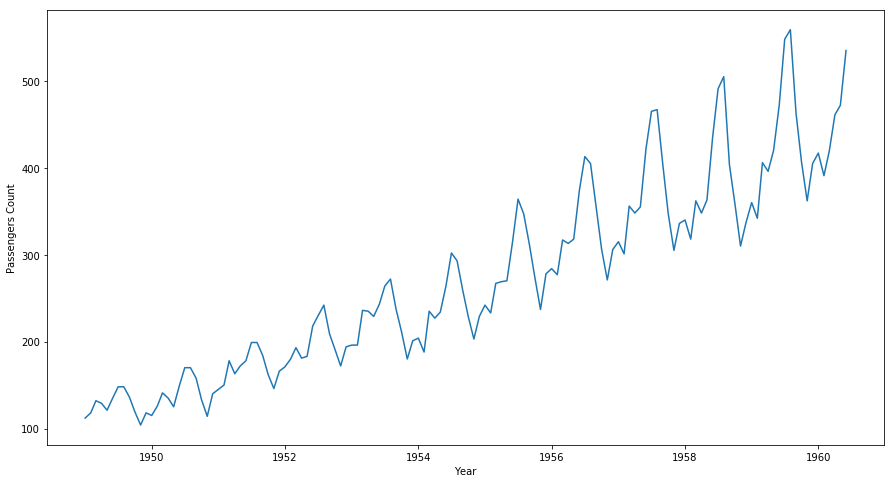

In [9]:
plt.figure(figsize=(15,8))
plt.plot(airline['Passengers Count'])
plt.xlabel('Year')
plt.ylabel('Passengers Count')
plt.show()

In [10]:
monthly_data=airline.resample('M').sum()
monthly_data.head()

,Passengers Count
Datetime,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


In [11]:
monthly_datas=airline.groupby(airline.index.month).sum()
monthly_datas

,Passengers Count
Datetime,
1,2901
2,2820
3,3242
4,3205
5,3262
6,3740
7,3594
8,3607
9,3121


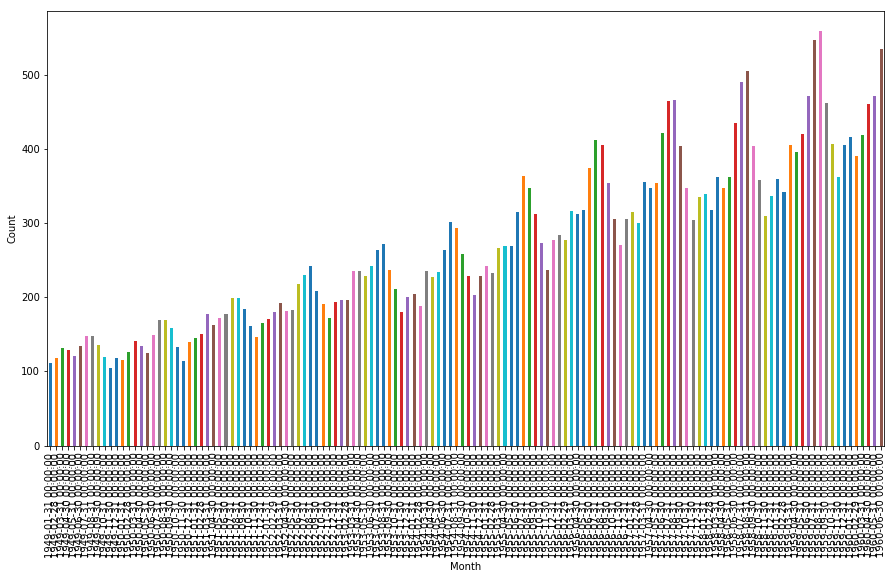

In [12]:
plt.figure(figsize=(15, 8))
monthly_data['Passengers Count'].plot.bar()
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [13]:
Yearly_data=airline.resample('Y').sum()
Yearly_data

,Passengers Count
Datetime,
1949-12-31,1520
1950-12-31,1676
1951-12-31,2042
1952-12-31,2364
1953-12-31,2700
1954-12-31,2867
1955-12-31,3408
1956-12-31,3939
1957-12-31,4421


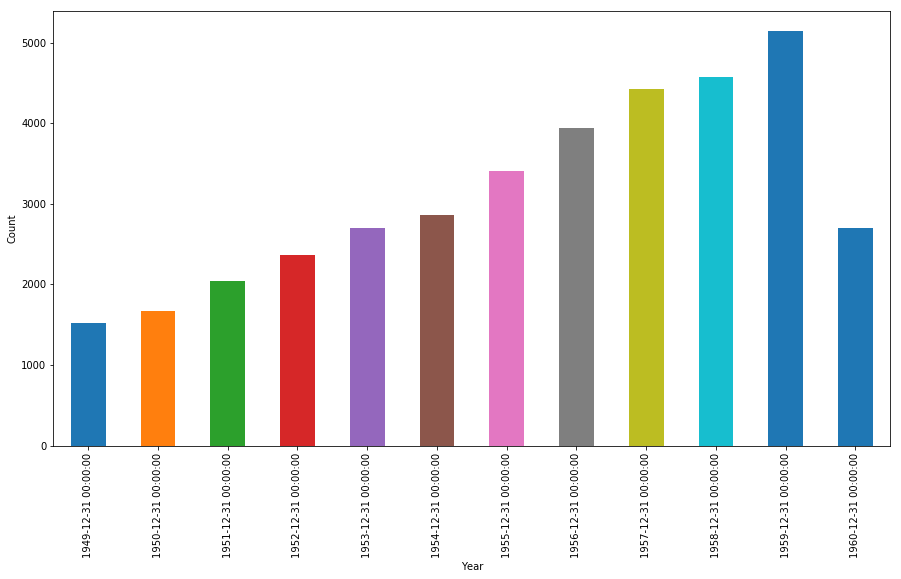

In [14]:
plt.figure(figsize=(15,8))
Yearly_data['Passengers Count'].plot.bar()
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

In [15]:
monthly_data

,Passengers Count
Datetime,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
1949-06-30,135
1949-07-31,148
1949-08-31,148
1949-09-30,136


In [16]:
training_data=monthly_data.loc[:'1957-12-31']
validation_data=monthly_data.loc['1957-12-31':]
training_data.tail()

,Passengers Count
Datetime,
1957-08-31,467
1957-09-30,404
1957-10-31,347
1957-11-30,305
1957-12-31,336


In [17]:
validation_data.head()

,Passengers Count
Datetime,
1957-12-31,336
1958-01-31,340
1958-02-28,318
1958-03-31,362
1958-04-30,348


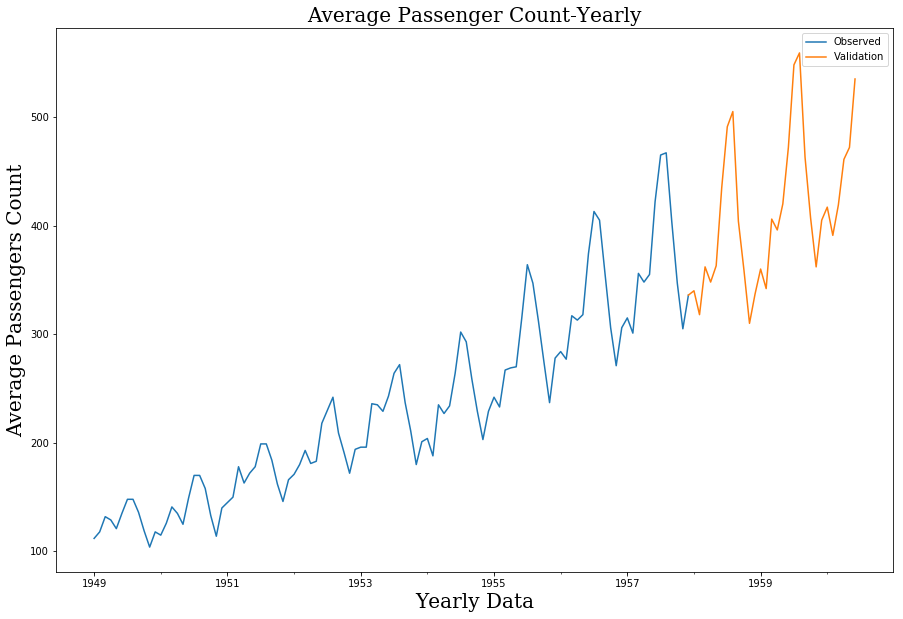

In [18]:
font_dict = {
    'family': 'serif',
    'weight': 'normal',
    'size': 20
}
plt.figure(figsize=(15, 10))
training_data['Passengers Count'].plot(label='Observed')
validation_data['Passengers Count'].plot(label='Validation')
plt.xlabel('Yearly Data', fontdict = font_dict)
plt.ylabel('Average Passengers Count', fontdict = font_dict)
plt.legend()
plt.title('Average Passenger Count-Yearly', fontdict = font_dict)
plt.show()

In [19]:
naive_value = training_data['Passengers Count'].iloc[-1]
naive_value


336

In [20]:
naive_approach=validation_data.copy()

In [21]:
naive_list=[naive_value for i in range (naive_approach.shape[0])]
len(naive_list)

31

In [22]:
naive_approach.shape[0]

31

In [23]:
naive_approach['Naive']=naive_list
naive_approach.head()

,Passengers Count,Naive
Datetime,,
1957-12-31,336,336
1958-01-31,340,336
1958-02-28,318,336
1958-03-31,362,336
1958-04-30,348,336


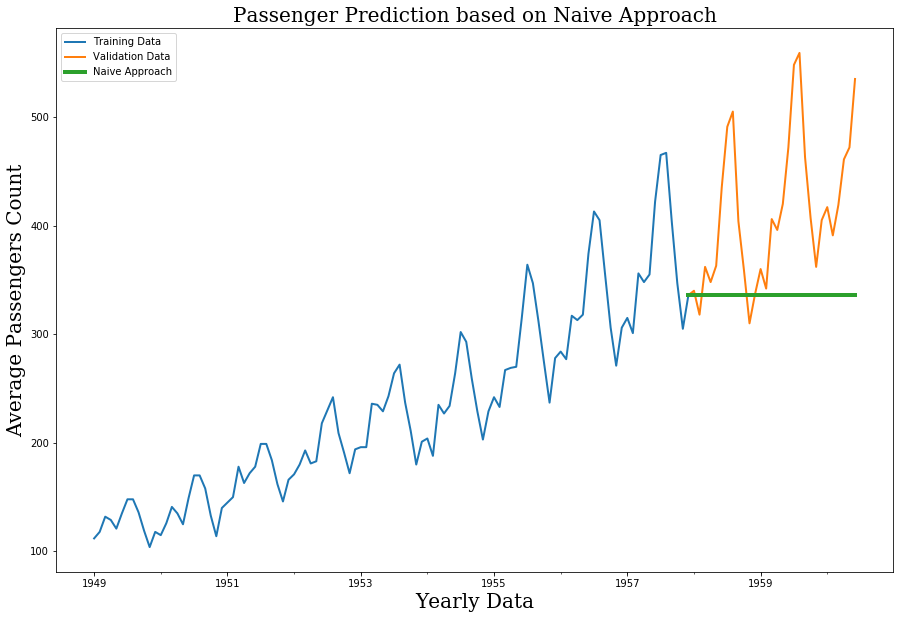

In [24]:
font_dict = {
    'family': 'serif',
    'weight': 'normal',
    'size': 20
}
plt.figure(figsize=(15, 10))
training_data['Passengers Count'].plot(label = 'Training Data', linewidth=2)
validation_data['Passengers Count'].plot(label = 'Validation Data', linewidth=2)
naive_approach.Naive.plot(label = 'Naive Approach', linewidth=4)
plt.legend()
plt.xlabel('Yearly Data', fontdict=font_dict)
plt.ylabel('Average Passengers Count', fontdict=font_dict)
plt.title('Passenger Prediction based on Naive Approach', fontdict=font_dict)
plt.savefig('Prediction-Naive-Approach.png')
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [26]:
rmse = sqrt(mean_squared_error(naive_approach.Naive, validation_data['Passengers Count']))
print(rmse)

101.00255506190058


moving approach

In [27]:
moving_approach=validation_data.copy()

In [28]:
moving_value=training_data['Passengers Count'].rolling()

TypeError: rolling() missing 1 required positional argument: 'window'